In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
path='./CondU6SanNicSupCal101'
header=120268

In [2]:
files=[x for x in os.listdir(path) if 'ecd' in x][-6:]
data=[]
for file in files:
    f = open(path+'/'+file, "r")
    a = np.fromfile(f, dtype=np.int8 , offset=header )
    f.close()
    data.append(a)

In [3]:
files

['DZSanNicSupC1F999C999I003.ecd',
 'DZSanNicSupC1F999C999I004.ecd',
 'DZSanNicSupC1F999C999I005.ecd',
 'DZSanNicSupC1F999C999I086.ecd',
 'DZSanNicSupC1F999C999I087.ecd',
 'DZSanNicSupC1F999C999I088.ecd']

In [4]:
bits=[]
for x in data:
    bits.append(x.shape[0])
bits=np.array(bits)    

In [100]:
shapes=np.array([4296,4397,3685,3812,4331,4684])

In [105]:
bits

array([68920, 70536, 59144, 61176, 69480, 75128])

In [91]:
shapes*16

array([68752, 70352, 58960, 60992, 69296, 74944])

In [123]:
bits - (shapes+1)*16

array([168, 168, 168, 168, 168, 168])

array([ 33, -68, -23, ...,   0,   0,   0], dtype=int8)

In [5]:
strips=[]
for x in data:
    long=int(len(x[:-168])/16)
    strips.append(np.reshape(x[:-168],(long,16)))

In [146]:
strips=[]
for x in data:
    long=int(len(x[168:])/16)
    strips.append(np.reshape(x[168:],(long,16)))

In [152]:
strips[0].T

array([[ -52,   -1,  -21, ...,  -78,   35,  123],
       [ -43,   57,   83, ...,  -14,   31,   24],
       [   1,   97,   17, ...,  119,  -53,  -17],
       ...,
       [ -60,   -1,  109, ...,   63,  -28,   50],
       [-126, -128,   69, ...,   10,  -83,   35],
       [ 127,    0,   29, ...,   49,  -14,   34]], dtype=int8)

In [6]:
def plot(data):
    fig, axs = plt.subplots(8, 1,figsize=[14,40])
        
    for i in range(0,8):
        axs[i].plot(data[:,i])
        axs[i].set_xlim(0,len(data[:,i]))
        axs[i].grid(True)
        axs[i].set_ylabel(str(i)) 
        axs[i].set_xticks(np.arange(0,len(data[:,i]),200))

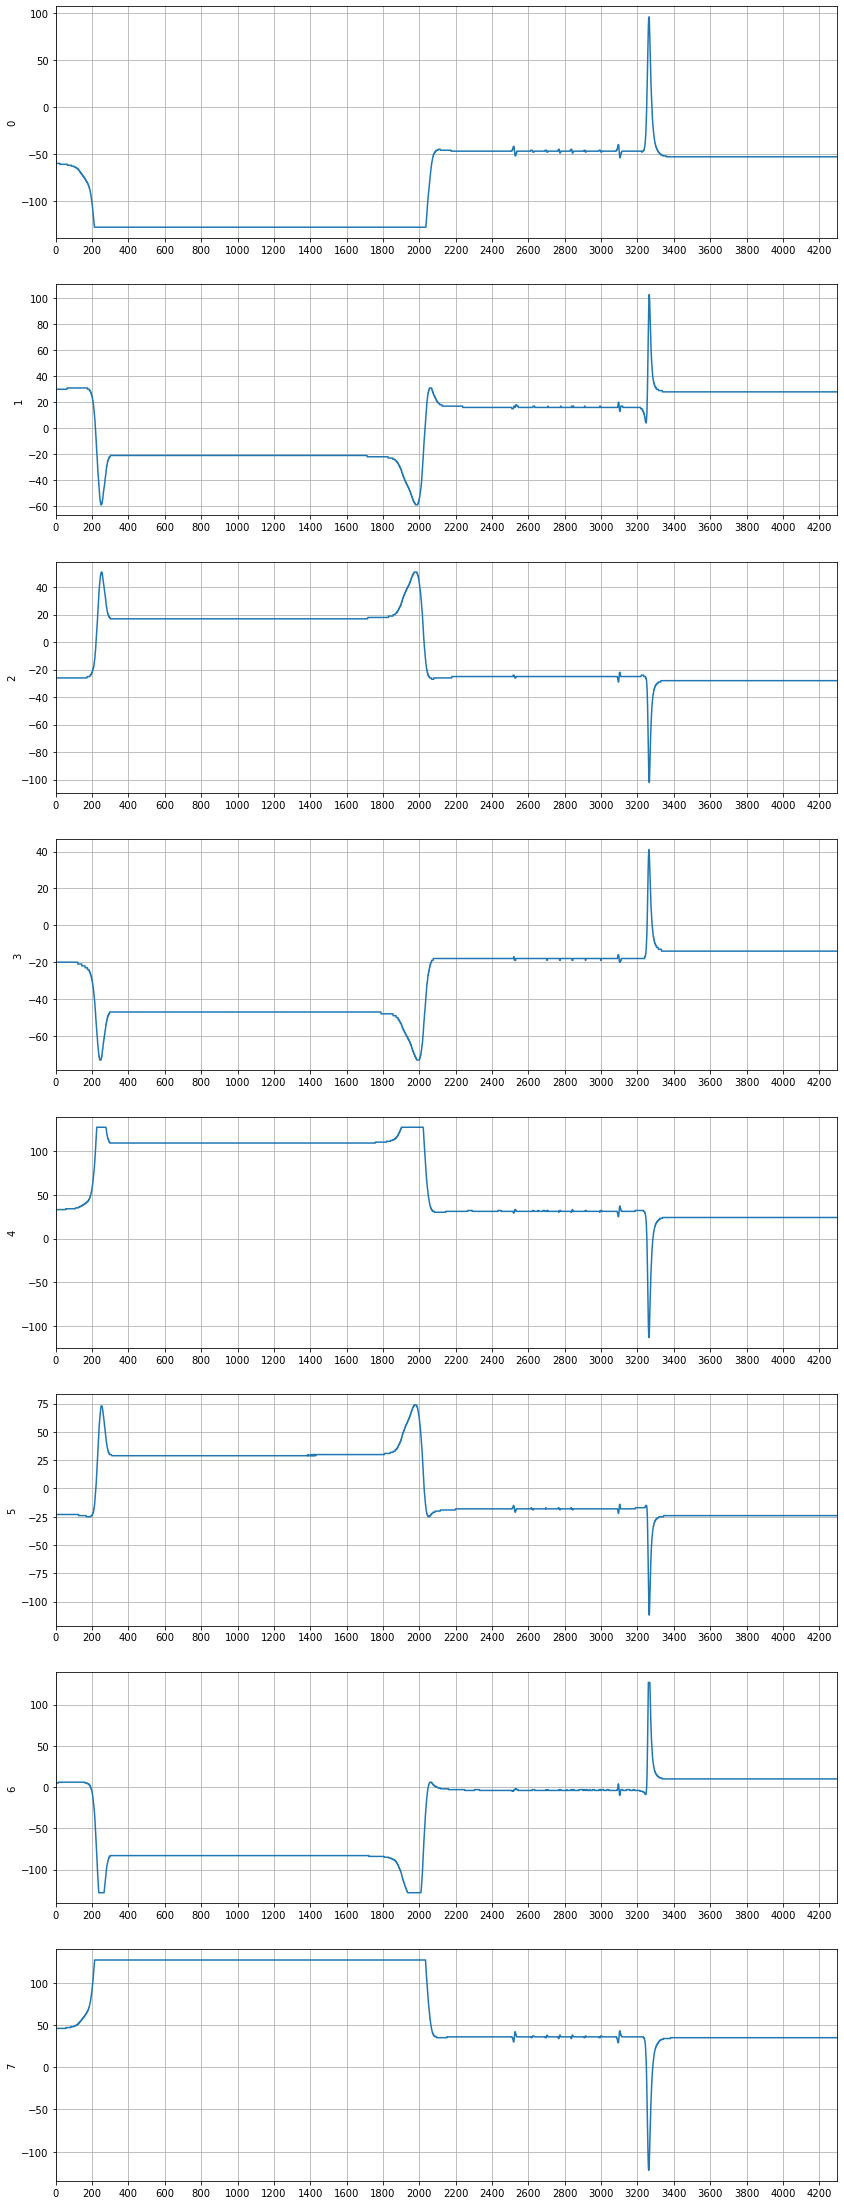

In [7]:
plot(strips[0][:,::2])

In [12]:
import pandas as pd
df0=pd.DataFrame(strips[0][:,::2],columns=['x1','x2','x3','x4','x5','x6','x7','x8'])
df0.columns.name='x'

In [9]:
df0

x     x1  x2  x3  x4  x5  x6  x7  x8     t
0    -52   1 -26 -20  33 -23   5  46     0
1    -60  30 -26 -20  33 -23   5  46     1
2    -60  30 -26 -20  33 -23   5  46     2
3    -60  30 -26 -20  33 -23   5  46     3
4    -60  30 -26 -20  33 -23   5  46     4
...   ..  ..  ..  ..  ..  ..  ..  ..   ...
4292 -53  28 -28 -14  24 -24  10  35  4292
4293 -53  28 -28 -14  24 -24  10  35  4293
4294 -53  28 -28 -14  24 -24  10  35  4294
4295 -53  28 -28 -14  24 -24  10  35  4295
4296 -53  28 -28 -14  24 -24  10  35  4296

[4297 rows x 9 columns]

In [14]:
import plotly.express as px

fig = px.line(df0, facet_col="x", facet_col_wrap=2)
fig.show()

In [15]:
df1=pd.DataFrame(strips[0][:,1::2],columns=['x1','x2','x3','x4','x5','x6','x7','x8'])
df1.columns.name='x'

In [33]:
x0=3260
dx=49
xmin=x0-(dx/2)
xmax=x0+(dx/2)


In [35]:
fig = px.line(df1, facet_col="x", facet_col_wrap=2,
                 width=1000, height=1200)
fig.update_layout(
    margin=dict( t=0, b=0)
 )

fig.update_xaxes(nticks=40)
fig.update_xaxes(range=[xmin, xmax])

fig.update_yaxes(range=[-128, 128])
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

fig.show()

In [84]:
import seaborn as sns

In [93]:

df = px.data.stocks(indexed=True)-1
fig = px.area(df, facet_col="company", facet_col_wrap=2)
fig.show()

In [96]:
df.columns.name

'company'

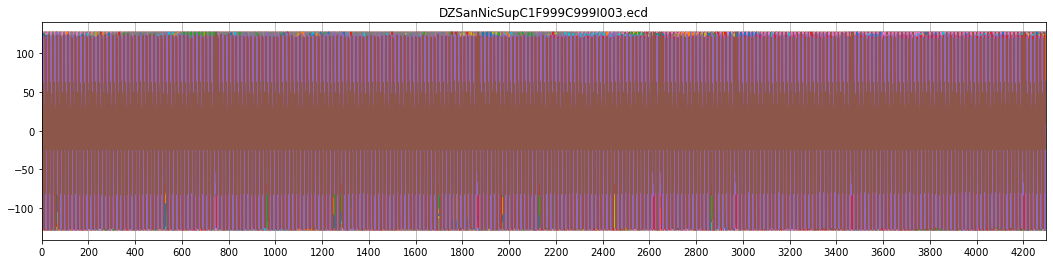

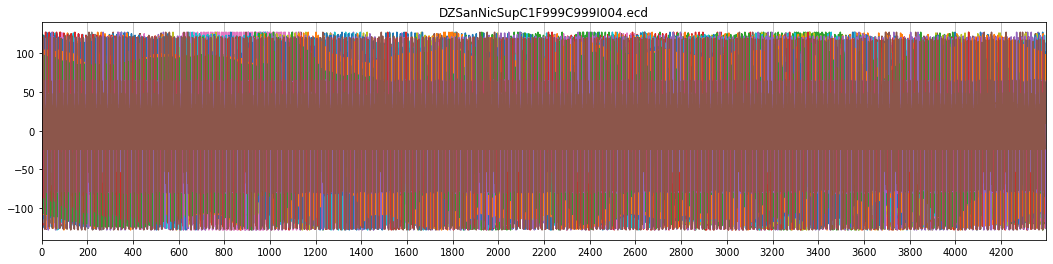

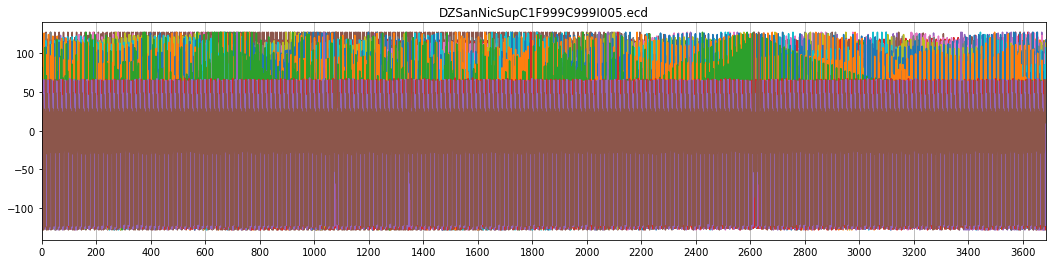

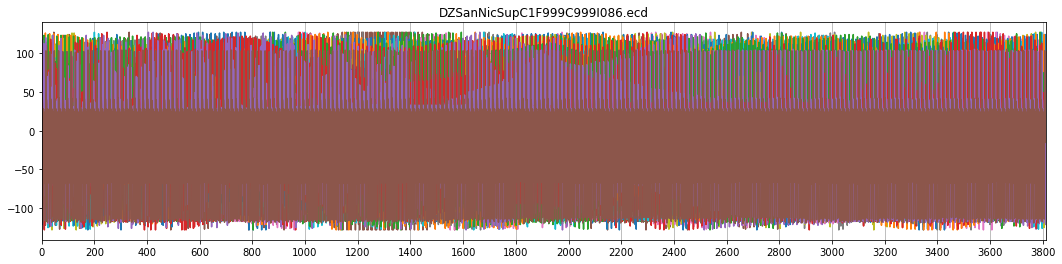

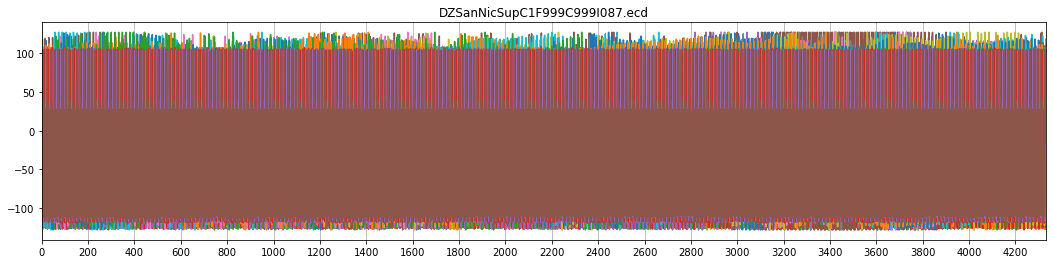

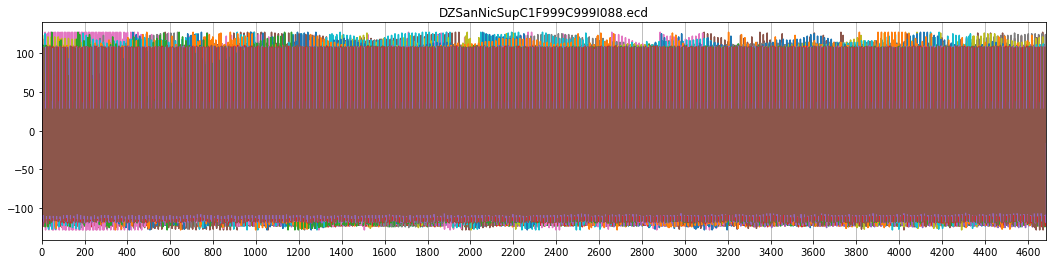

In [153]:
for i,x in enumerate(strips):
    plt.figure(figsize=(18,4))
    plt.plot(x.T)
    plt.xticks(np.arange(0,len(x.T),200))
    plt.xlim(0,len(x.T))
    plt.title(files[i])
    plt.grid(True)

In [117]:
files=[x for x in os.listdir(path) if 'ecd' in x][-6:]
data=[]
for file in files:
    f = open(path+'/'+file, "r")
    a = np.fromfile(f, dtype=np.dtype('int8') , offset=header )
    f.close()
    data.append(a)

In [118]:
for x in data:
    print(x.shape[0])

68920
70536
59144
61176
69480
75128


In [119]:
x

array([-52, -43,   1, ...,   0,   0,   0], dtype=int8)

In [ ]:
files

In [ ]:
re.search('F(\d\d\d)C(\d\d\d)I(\d\d\d)',files[0]).group(2)

In [ ]:
re.search('F(\d\d\d)C(\d\d\d)I(\d\d\d)',files[0]).group(3)

In [ ]:
for file in files:
    print(re.search('F(\d\d\d)C(\d\d\d)',file).group(1))
    print(re.search('F(\d\d\d)C(\d\d\d)',file).group(2))

In [ ]:
files

In [ ]:
import re

In [ ]:
len(data)

In [ ]:
import ecd
import numpy as np

path='./CondU6SanNicSupCal101'
exp = ecd.loader.Exp(path)

In [ ]:
filas=[]
for tubo in exp.data:
    filas.append(tubo.fila)

In [ ]:
cols=[]
for tubo in exp.data:
    cols.append(tubo.columna)

In [ ]:
ax0=np.array(list(map(int,filas)))

In [ ]:
ax1=np.array(list(map(int,cols)))

In [ ]:
ax0

In [ ]:
ax1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
int('4')

In [ ]:
l= ['3,4','5,6']

In [ ]:
l.index('5,6')

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(ax0,ax1,'o')
plt.xlim(0,60)
plt.ylim(0,50)
plt.grid(True)

In [ ]:
tubo=exp.iloc(0)

In [ ]:
tubo

In [ ]:
tubo.data

In [ ]:
tubo.data.shape

In [ ]:
def plot(data):
    fig, axs = plt.subplots(16, 1,figsize=[14,40])
    for i in range(0,16):
        axs[i].plot(data[:,i])
        axs[i].grid(True)

# Ploteos

In [ ]:
import ecd
import numpy as np

path='./CondU6SanNicSupCal101'
exp = ecd.loader.Exp(path)

In [ ]:
tubo1=exp.loc(0,37)
patron1=exp.patron(0)

In [ ]:
patron1

In [62]:
strips=[]
for i in range(0,patron1.data[:,::2].shape[1]):
    strips.append(patron1.data[:,::2][:,i])

alfanus=[]
for i in range(0,patron1.data[:,1::2].shape[1]):
    alfanus.append(patron1.data[:,1::2][:,i])

In [63]:
import plotly.express as px
import matplotlib.pyplot as plt


In [67]:
np.arange(0,100,10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

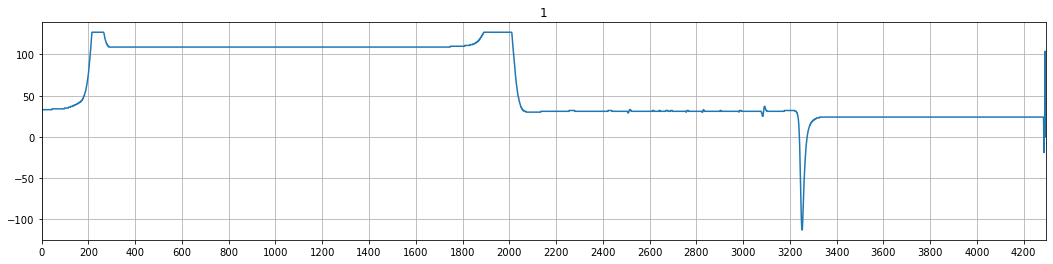

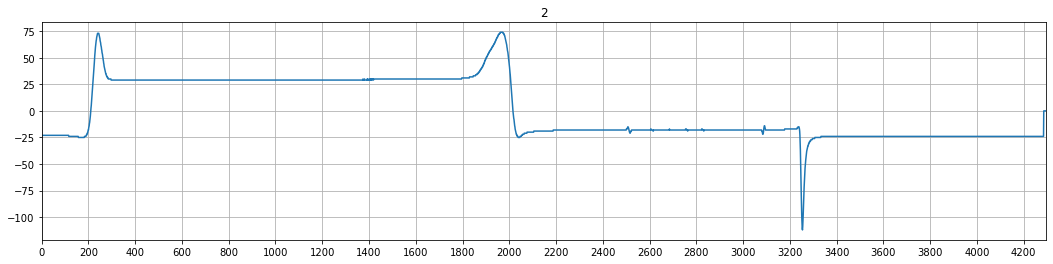

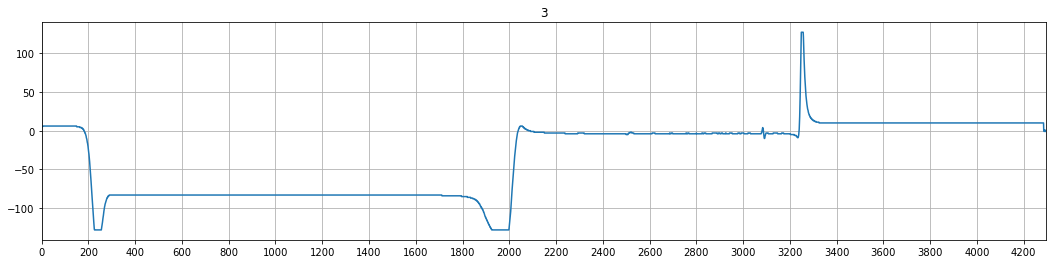

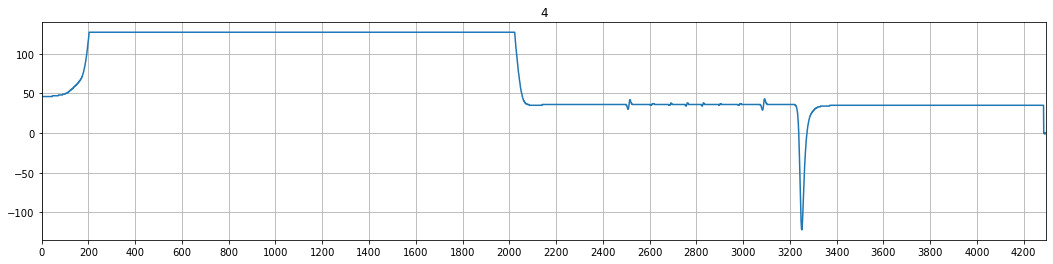

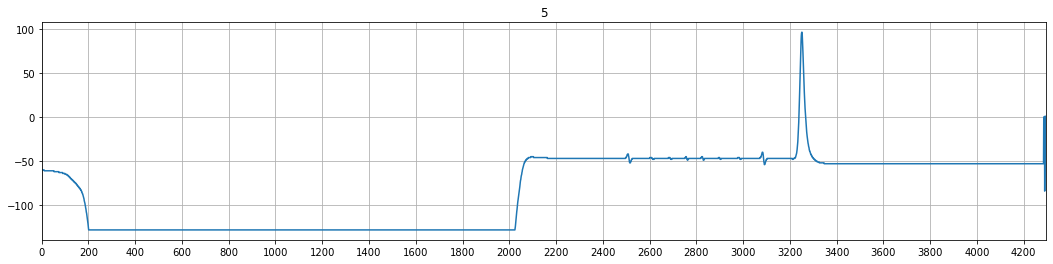

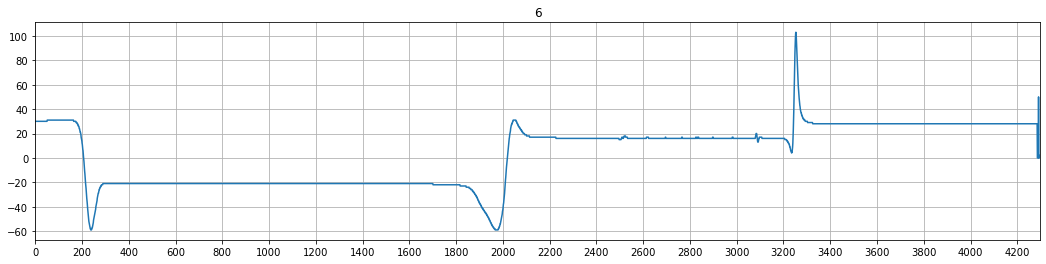

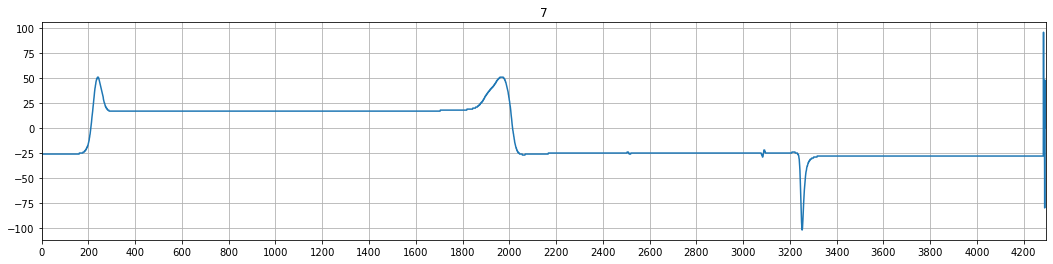

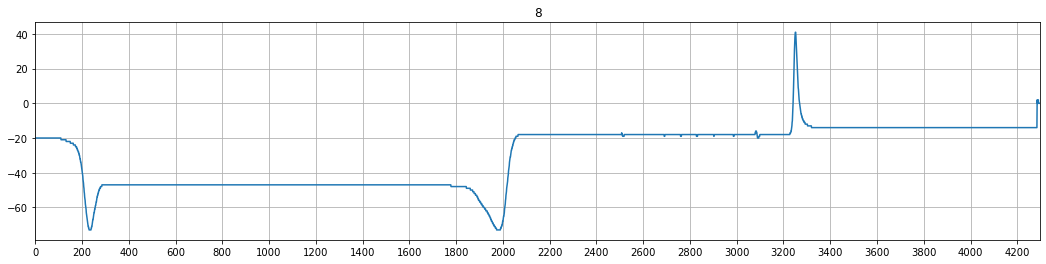

In [71]:
for i,x in enumerate(strips):
    plt.figure(figsize=(18,4))
    plt.plot(x)
    plt.xticks(np.arange(0,len(x),200))
    plt.xlim(0,len(x))
    plt.title(i+1)
    plt.grid(True)

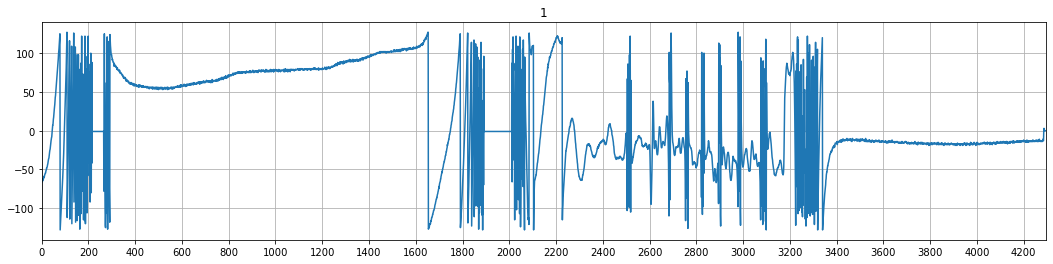

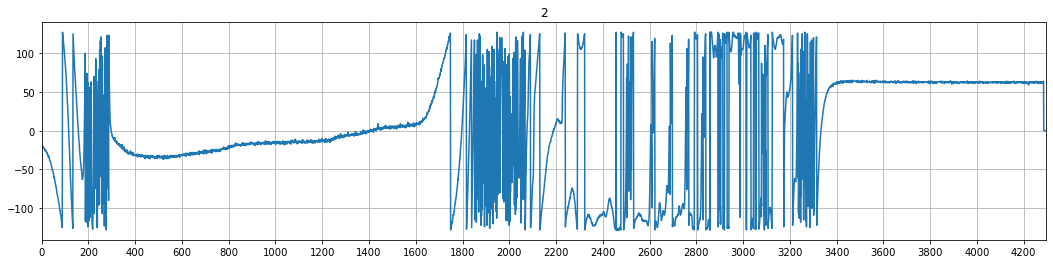

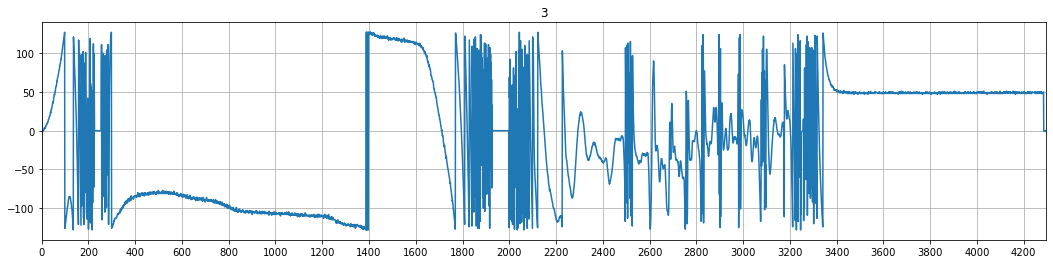

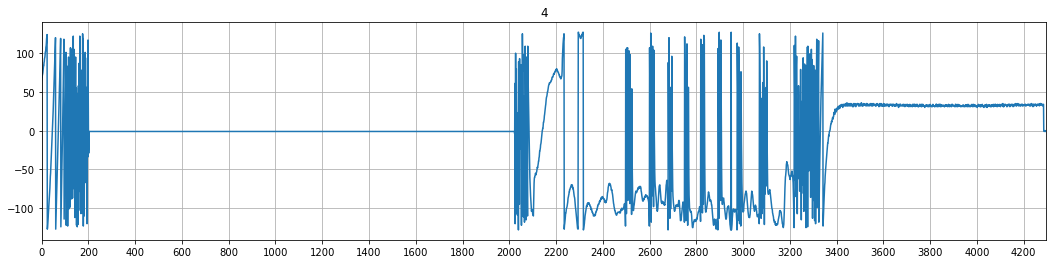

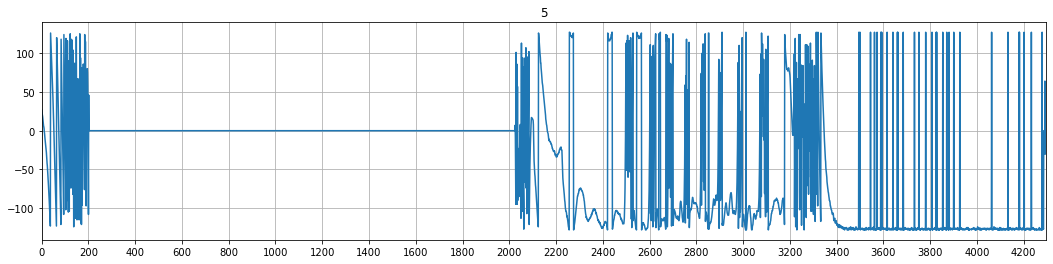

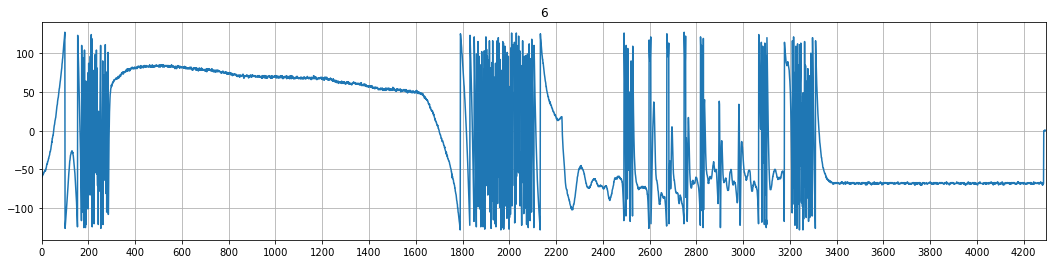

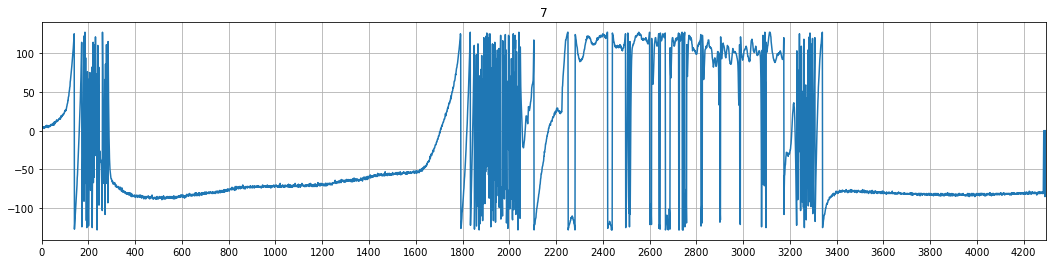

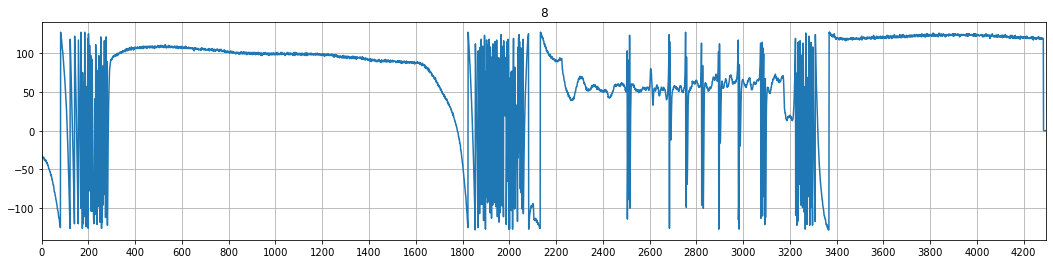

In [73]:
for i,x in enumerate(alfanus):
    plt.figure(figsize=(18,4))
    plt.plot(x)
    plt.xticks(np.arange(0,len(x),200))
    plt.xlim(0,len(x))
    plt.title(i+1)
    plt.grid(True)

In [ ]:
patron1

In [ ]:
patron1.data.shape

In [ ]:
tubo=exp.loc(0,37)
tubo

In [ ]:
plot(tubo.data)

In [ ]:
tubo.data.shape

In [ ]:
tubo.data[:,::2][:,0]

In [ ]:
for i in range(0,8):
    x=patron1.data[:,::2][:,i]
    fig = px.line(x,title=str(i+1))
    #fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
    fig.show()

In [ ]:
for i in range(0,8):
    x=patron1.data[:,1::2][:,i]
    fig = px.line(x,title=str(i+1))
    #fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
    fig.show()